In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

def trend(time, slope=0):
    return slope * time

def seasonal_pattern(season_time):
    """Just an arbitrary pattern, you can change it if you wish"""
    return np.where(season_time < 0.1,
                    np.cos(season_time * 7 * np.pi),
                    1 / np.exp(5 * season_time))

def seasonality(time, period, amplitude=1, phase=0):
    """Repeats the same pattern at each period"""
    season_time = ((time + phase) % period) / period
    return amplitude * seasonal_pattern(season_time)

def noise(time, noise_level=1, seed=None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level

In [15]:
def compute_units(periods, units):
    return periods*units
time = {
    'minutes': 60,
    'hours': 24,
    'days': 365
}
periods = 8
if (periods & 4 == 0) and time[]:
    leap = periods/4
else:
    leap = 0
time = np.arange(periods * time['days'] + leap, dtype="float32")
return time

print(len(time))
baseline = 10
series = trend(time, 0.1)  
baseline = 10
amplitude = 40
slope = 0.01
noise_level = 2

# Create the series
series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)
# Update with noise
series += noise(time, noise_level, seed=42)


2922


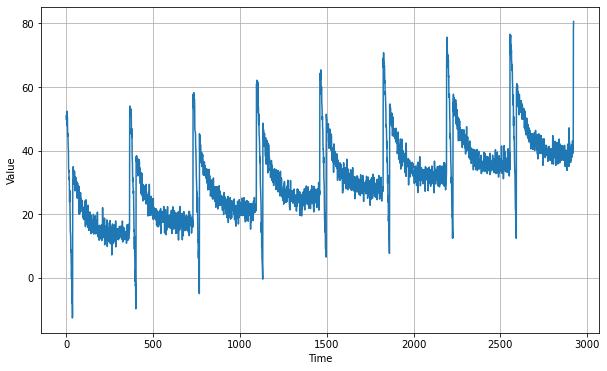

In [16]:

plt.figure(figsize=(10, 6))
plot_series(time, series)
plt.show()

In [7]:
1 % 4

1

In [8]:
2 % 4

2

In [9]:
3 % 4

3

In [10]:
4 % 4

0

In [11]:
5 % 4

1

In [12]:
7 % 4

3